In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, kstest
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

## WHO Dataset :
### Describtion:


### *1) id: unique identifier*

### *2) gender: "Male", "Female" or "Other"*

### *3) age: age of the patient**

### *4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension*

### *5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease*

### *6) ever_married: "No" or "Yes"*

### *7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"*

### *8) Residence_type: "Rural" or "Urban"*

### *9) avg_glucose_level: average glucose level in blood*

### *10) bmi: body mass index*

### *11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"**

### *12) stroke: 1 if the patient had a stroke or 0 if not*

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient*


In [2]:
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Let's Check Null Value :
### Only Bmi Has Null Value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

<AxesSubplot:>

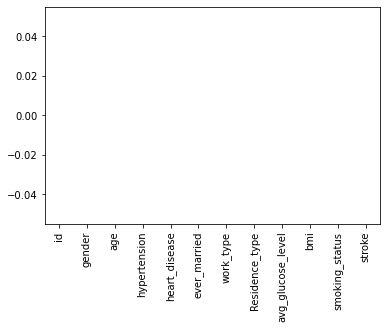

In [6]:
data.isnull().sum().plot(kind='bar')

In [7]:
data['id'].duplicated().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


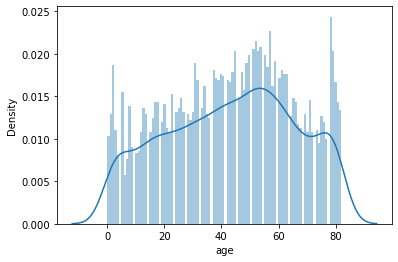

In [8]:
sns.distplot(data['age'], bins=100);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


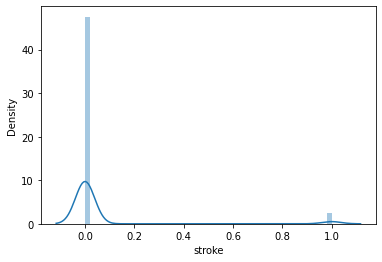

In [9]:
# Bernoli Distribution 
sns.distplot(data['stroke']);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


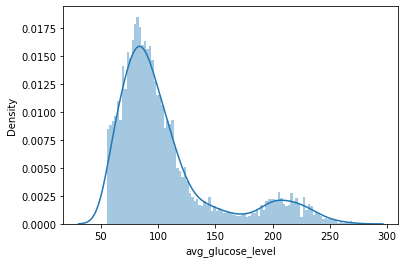

In [10]:
# is it normal or not ?
## let's check it 
sns.distplot(data['avg_glucose_level'], bins=100);

In [11]:
def kl(p, q):
    res = np.sum(np.where(np.logical_and( p!=0 ,q!=0), p * np.log(p / q), 0))
    return res

In [12]:
count, devision = np.histogram(data['avg_glucose_level'], bins=100)

In [13]:
ideal = norm.rvs(size=len(data['avg_glucose_level']), loc = data['avg_glucose_level'].mean(), scale =  data['avg_glucose_level'].std())
icount, idevision = np.histogram(ideal, bins=100)

In [14]:
kl(count/5110, icount/5110)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


1.8323575091403408

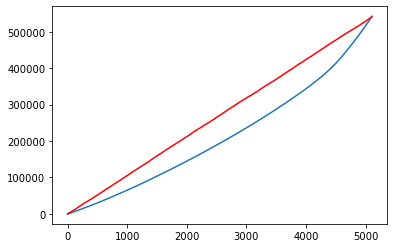

In [15]:
plt.plot(np.cumsum(data['avg_glucose_level'].sort_values().reset_index(drop=True)))
plt.plot(np.cumsum(ideal), color='red')

<AxesSubplot:ylabel='Frequency'>

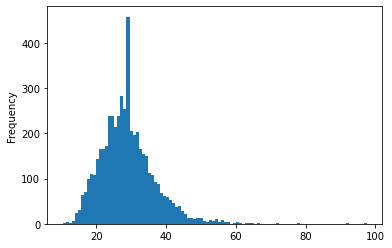

In [16]:
data['bmi'].plot(kind='hist', bins=100)

In [17]:
ideal = norm.rvs(size=len(data['bmi']), loc = data['bmi'].mean(), scale =  data['bmi'].std())

(array([  1.,   3.,   2.,   7.,  24.,  31.,  63.,  70., 100., 110., 109.,
        143., 165., 166., 171., 238., 238., 214., 238., 282., 255., 458.,
        205., 197., 204., 166., 154., 150., 113., 108.,  93.,  89.,  68.,
         61.,  59.,  53.,  46.,  37.,  40.,  29.,  21.,  12.,  12.,  10.,
         12.,  13.,   6.,   5.,   8.,   6.,  10.,   4.,   8.,   5.,   4.,
          0.,   1.,   3.,   2.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([10.3  , 11.173, 12.046, 12.919, 13.792, 14.665, 15.538, 16.411,
        17.284, 18.157, 19.03 , 19.903, 20.776, 21.649, 22.522, 23.395,
        24.268, 25.141, 26.014, 26.887, 27.76 , 28.633, 29.506, 30.379,
        31.252, 32.125, 32.998, 33.871, 34.744, 35.617, 36.49 , 37.363,
        38.236, 39.109, 39.982

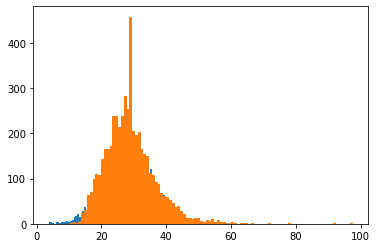

In [18]:
plt.hist(ideal, bins=100)
plt.hist(data['bmi'], bins=100)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


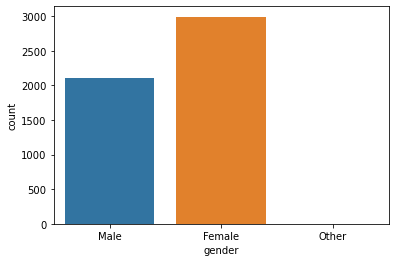

In [19]:
sns.countplot(data['gender']);

## Clean The Data:

### ** When i want to try remove the Other on gender column i got error ** 
### so try to another way to remove it 

In [20]:
data.loc[data['gender'].str.contains('Other')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [21]:
data[data.gender.values == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [22]:
def remove(gender):
    if 'Other' in gender:
        return np.nan
    else:
        return gender

In [23]:
data['gender'] = data['gender'].apply(remove)
data['gender'] = data['gender'].dropna()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


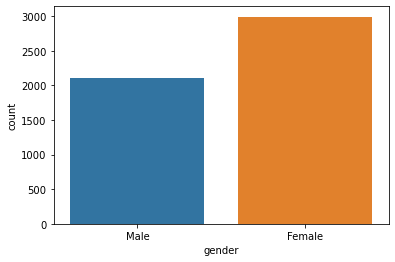

In [24]:
sns.countplot(data['gender']);

In [25]:
data = data.drop('id', axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


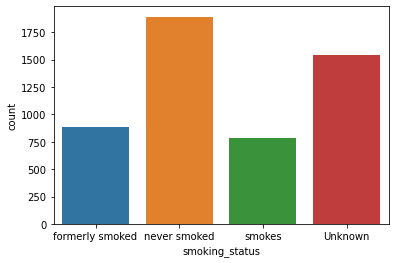

In [26]:
sns.countplot(data['smoking_status']);

In [27]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [28]:
from numpy import nan as NA
#data[data['age'] < 20]
def remove_age(age):
    if age < 18:
        return NA
    else:
        return age

In [29]:
data['age'] = data['age'].apply(remove_age)
data['age'].dropna(inplace=True)
data.dropna(inplace=True)

In [30]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [31]:
data['age'].describe()

count    4253.000000
mean       50.207853
std        17.827267
min        18.000000
25%        36.000000
50%        51.000000
75%        64.000000
max        82.000000
Name: age, dtype: float64

### Children (00-14 years)
### Youth (15-24 years)
### Adults (25-64 years)
### Seniors (65 years and over)

In [32]:
data['categori_age'] = pd.cut((data['age']), 3, labels=['Youth ', 'Adults ', 'Seniors '])

In [33]:
obj = data.select_dtypes(include='object')
obj

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [34]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,categori_age
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Seniors
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Seniors
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Seniors
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Adults
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Seniors
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Seniors
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Youth
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Adults


##  Now We Want To See If The Age Is More Than 40 or 50 Is Really Effected On Stroke Or Not
### if p_value < 0.5 means we can have a reason to prove it if the p_value > 0.5 means maybe it happens base on chance

In [35]:
from numpy import sqrt, round, abs

In [36]:
dataA = data[data['age'] >= 50]['stroke']
dataB = data[data['age'] < 50]['stroke']

In [37]:
Amean = dataA.mean()
Bmean = dataB.mean()
Astd = dataA.std()
Bstd = dataB.std()
Alen = len(dataA)
Blen = len(dataB)

In [38]:
above = Amean - Bmean
below = sqrt((Astd ** 2 / Alen) + (Bstd ** 2 / Blen))
z  = above / below 

In [39]:
z

13.929885178315345

In [40]:
p_value = 2 * (1 - norm.cdf(abs(z)))
p_value

0.0

## Anova_Test

In [41]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [42]:
res = ols('stroke ~ age', data=data).fit()
sm.stats.anova_lm(res)

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,14.638630,14.638630,285.431755,4.991055e-62
Residual,4251.0,218.016437,0.051286,NaN,NaN


In [43]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,categori_age
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Seniors
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Seniors
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Seniors
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Adults
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Seniors
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Seniors
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Youth
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Adults


In [44]:
data.groupby(['gender', 'categori_age'])['stroke'].size()

gender  categori_age
Female  Youth           853
        Adults          962
        Seniors         761
Male    Youth           460
        Adults          674
        Seniors         543
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke'>

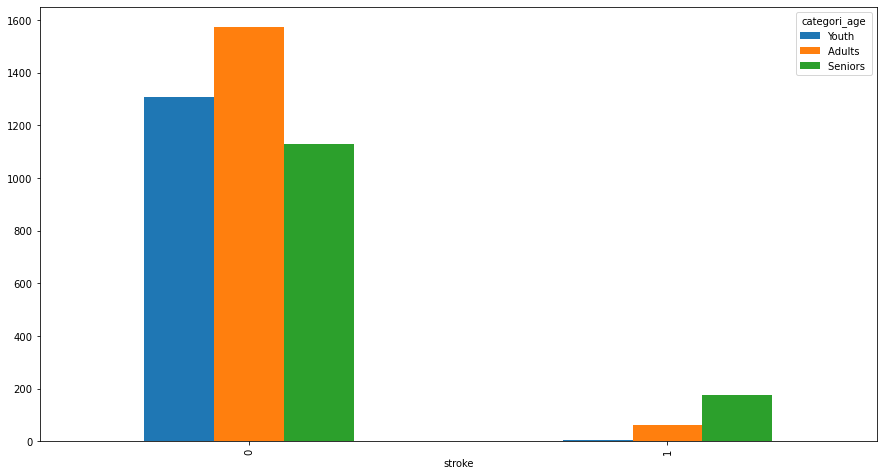

In [45]:
data.pivot_table(values='age', columns='categori_age', index='stroke', aggfunc='count').plot(kind='bar', figsize=(15, 8))

<AxesSubplot:xlabel='Residence_type,work_type'>

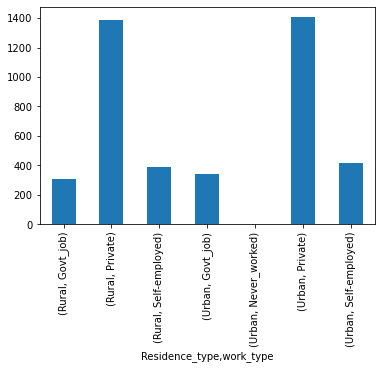

In [46]:
data.groupby(['Residence_type', 'work_type'])['stroke'].size().plot(kind='bar')

In [47]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,categori_age
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Seniors
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Seniors
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Seniors
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Adults
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Seniors
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Seniors
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Youth
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Adults


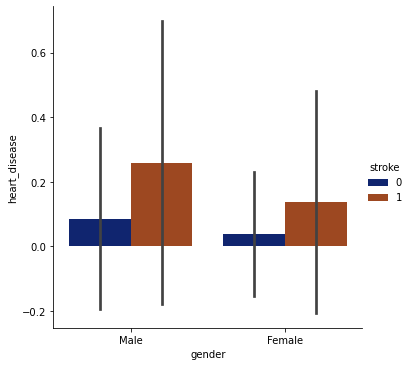

In [48]:
sns.catplot(
    data=data, kind="bar",
    x="gender", y="heart_disease", hue="stroke",
    ci="sd", palette="dark"
)

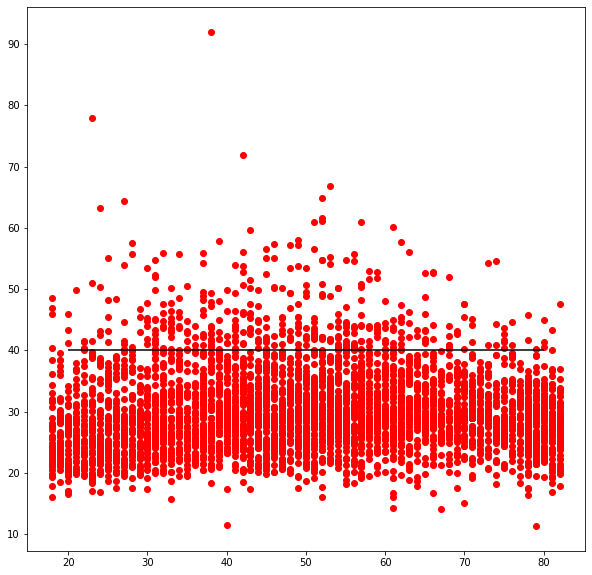

In [49]:
plt.figure(figsize=(10, 10))
plt.hlines(40, 20, 80, color='black')
plt.scatter(x=data['age'], y=data['bmi'], color='red')

# Convert To Numerical:

In [50]:
data['gender'] = pd.get_dummies(data['gender'])
data['Residence_type'] = pd.get_dummies(data['Residence_type'])
data['ever_married'] = pd.get_dummies(data['ever_married'])
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
##                              *** For Machine Learning use ohe ***
#ohe = make_column_transformer((OneHotEncoder(), ['work_type', 'smoking_status', 'categori_age']), remainder='passthrough')
#data = ohe.fit_transform(data)

In [51]:
label = LabelEncoder()
data['work_type'] = label.fit_transform(data['work_type'])
data['smoking_status'] = label.fit_transform(data['smoking_status'])
data['categori_age'] = label.fit_transform(data['categori_age'])


In [52]:
data.drop('age', inplace=True, axis=1)

In [53]:
from sklearn.preprocessing import StandardScaler
stn = StandardScaler()
data['avg_glucose_level'] = stn.fit_transform(data['avg_glucose_level'].values.reshape(-1, 1))
data['bmi'] = stn.fit_transform(data['bmi'].values.reshape(-1, 1))


In [54]:
data

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,categori_age
0,0,0,1,0,2,0,2.516073,0.879412,1,1,1
1,1,0,0,0,3,1,1.961709,-0.208303,2,1,1
2,0,0,1,0,2,1,-0.054143,0.300747,2,1,1
3,1,0,0,0,2,0,1.313136,0.568909,3,1,0
4,1,1,0,0,3,1,1.373639,-0.898924,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,1,0,0,2,0,-0.518276,-0.208303,2,0,1
5106,1,0,0,0,3,0,0.349488,1.359281,2,0,1
5107,1,0,0,0,3,1,-0.534187,0.032586,2,0,2
5108,0,0,0,0,2,1,1.209716,-0.673103,1,0,0


# Feature Selcetion
## Chi2

In [55]:
from sklearn.feature_selection import chi2, SelectKBest

x = data.drop('stroke', axis=1)
y =  data['stroke']
best_f = SelectKBest(chi2, k=5)
best_f.fit_transform(abs(x), y)


dfscores = pd.DataFrame(best_f.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['feature','score']  
print(featureScores.nlargest(5,'score')) 

             feature      score
2      heart_disease  64.000522
1       hypertension  50.724115
6  avg_glucose_level  40.083305
3       ever_married  12.969284
9       categori_age   7.162684


<AxesSubplot:>

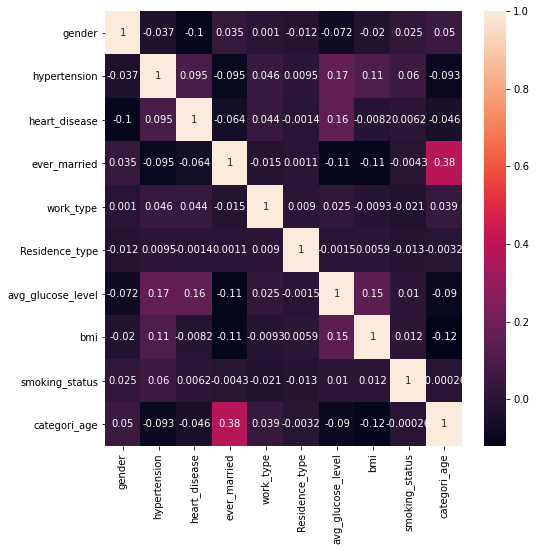

In [56]:
plt.figure(figsize=(8, 8))
sns.heatmap(x.corr(), annot=True)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [58]:
from  sklearn.metrics import confusion_matrix

# Random_Forest:


In [59]:
from sklearn.ensemble  import RandomForestClassifier
clf_r = RandomForestClassifier(n_estimators=10)
clf_r.fit(x_train, y_train)
print(clf_r.score(x_train, y_train))
r_predict = clf_r.predict(x_test)
# Evaluate Model:
print(confusion_matrix(y_test, r_predict))

0.9882431978501848
[[1189    8]
 [  79    0]]


# Logestic_regression:

In [60]:
from  sklearn.linear_model import LogisticRegression
clf_l = LogisticRegression()
clf_l.fit(x_train, y_train)
print(clf_l.score(x_train, y_train))
l_predict = clf_l.predict(x_test)
# Evaluate Model:
print(confusion_matrix(y_test, l_predict))

0.9435673496808868
[[1197    0]
 [  79    0]]


# SVM:

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'poly'), 'C':[1,2, 3, 4, 5]}

svc = SVC()
clf_sg = GridSearchCV(svc, parameters)
clf_sg.fit(x_train, y_train)

print(clf_sg.best_estimator_)
print(clf_sg.score(x_train, y_train))

sg_predict = clf_sg.predict(x_test)
# Evaluate Model:
print(confusion_matrix(y_test, sg_predict))

SVC(C=1, kernel='linear')
0.9435673496808868
[[1197    0]
 [  79    0]]


# PCA:

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x2d = pca.fit_transform(x_train)

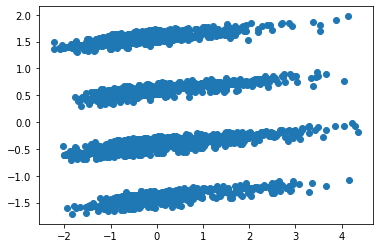

In [63]:
plt.scatter(x = x2d[:, 0], y = x2d[:, 1])

In [64]:
pca.explained_variance_ratio_

array([0.21863728, 0.19354476])

# Another Way To Feature Selection:
### use Boruta 
#### See How It's Work



Faster run times, thanks to scikit-learn

Scikit-learn like interface

Compatible with any ensemble method from scikit-learn

Automatic n_estimator selection

Ranking of features

Feature importances are derived from Gini impurity instead of RandomForest R package's MDA

In [65]:
import xgboost as xgb
model = xgb.XGBClassifier()
from boruta import BorutaPy
feature = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

## Pay attention Use Np.Array Is Not Mandetory

In [66]:
feature.fit(np.array(x_train), np.array(y_train))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:10:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
[08:10:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
[08:10:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
[08:10:26] WARNING: ../src/learner.cc:1061: Starting in XG

BorutaPy(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                 colsample_bylevel=1, colsample_bynode=1,
                                 colsample_bytree=1, gamma=0, gpu_id=-1,
                                 importance_type='gain',
                                 interaction_constraints='',
                                 learning_rate=0.300000012, max_delta_step=0,
                                 max_depth=6, min_child_weight=1, missing=nan,
                                 monotone_constraints='()', n_estimators=33,
                                 n_jobs=4, num_parallel_tree=1,
                                 random_state=108344413, reg_alpha=0,
                                 reg_lambda=1, scale_pos_weight=1, subsample=1,
                                 tree_method='exact', validate_parameters=1,
                                 verbosity=None),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F7706515D10, v

In [67]:
print(feature.support_)
print(feature.ranking_)
print(x_train.columns[feature.support_].to_list())

[False False False False False False False False False  True]
[10  3  5  2  7  9  7  5  4  1]
['categori_age']


In [68]:
x_boruta = feature.transform(np.array(x_train))

In [69]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_boruta, y_train)

[08:10:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
x_test_filtered = feature.transform(np.array(x_test))
prediction_xgb = xgb_model.predict(x_test_filtered)

In [71]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_xgb))

Accuracy =  0.9380877742946708


<AxesSubplot:>

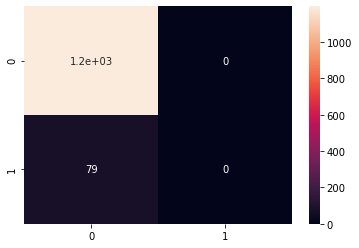

In [72]:
cm = confusion_matrix(y_test, prediction_xgb)
#print(cm)
sns.heatmap(cm, annot=True)